In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data
jam_ed_data = pd.read_csv('Jamboree_Admission.csv')

In [3]:
jam_ed_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
#Dropping the unique row Identifier
jam_ed_data.drop(columns='Serial No.',inplace=True)

In [5]:
jam_ed_data.shape

(500, 8)

- There are 500 entries and 8 columns.

In [6]:
jam_ed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
jam_ed_data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


- There are no null values in the data.
- All variables are in int or float dtype.
- The value of each variable are under its range by looking at max and min.
- There are no outliers as the mean and median are almost equal.

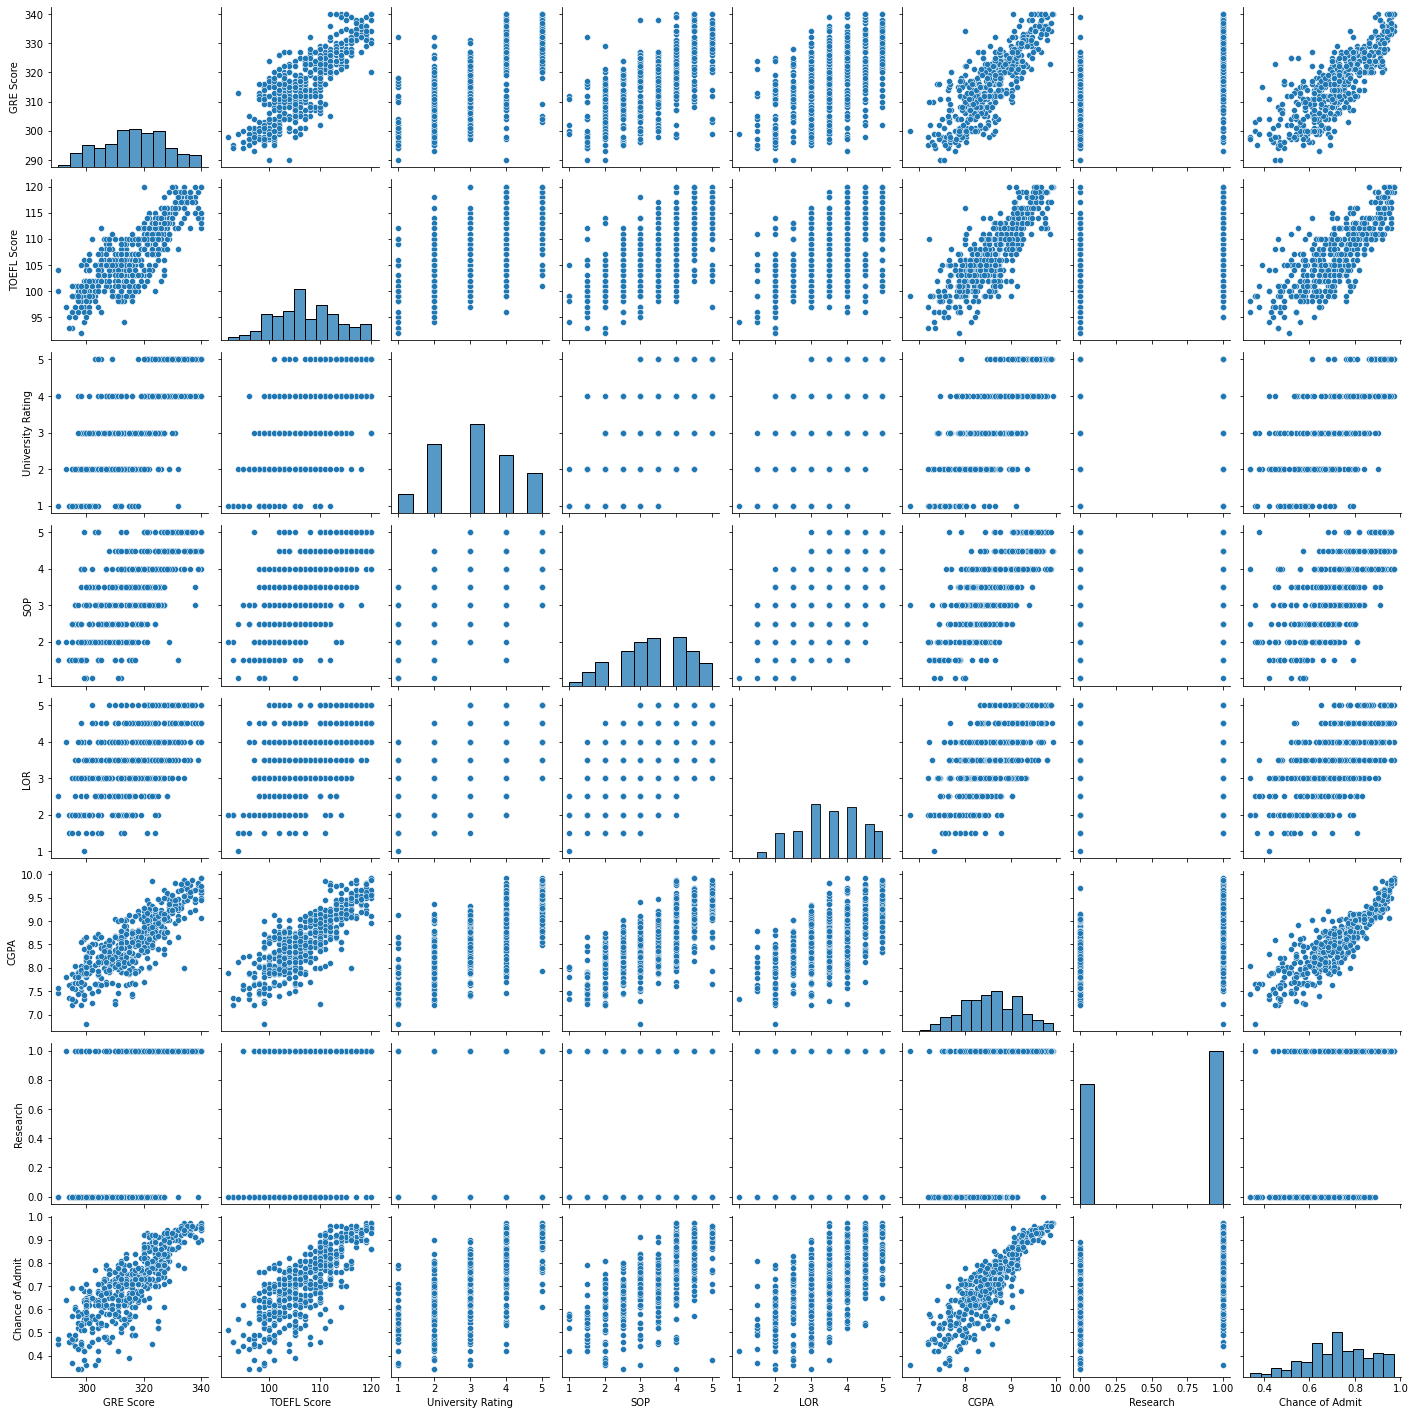

In [8]:
sns.pairplot(data=jam_ed_data)

- GRE Score, TOEFL Score, CGPA are so much interlinked linearly with high correlation.
- GRE Score, TOEFL Score, CGPA are somewhat normally distributed.
- In between University Rating, SOP, LOR there is some correlation as we can observe the range of interval is increasing.
- Reasearch is not following any relation with other variables.

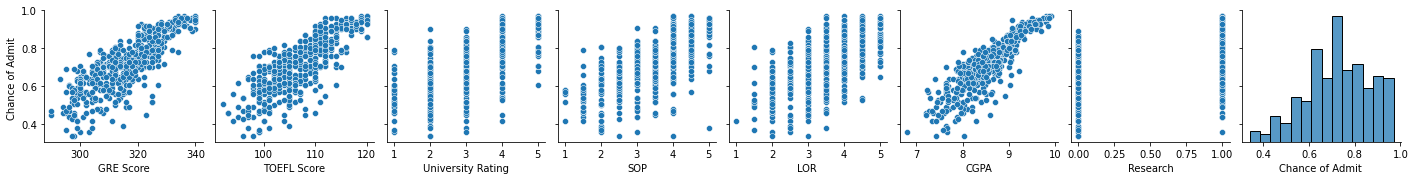

In [9]:
# plt.figure(figsize=(20,4))
sns.pairplot(data=jam_ed_data,y_vars='Chance of Admit ')
plt.show()

- There is a linear upwards trend of Chance of Admit(Dependent variable) by GRE Score, TOEFL Score, CGPA(Independent variable).
- CGPA has low noice than GRE Score or TOEFL Score with respect to Chance of Admit.
- The range interval of Chance of Admit is increasing as the University Rating, SOP, LOR (Independent Variables) are increasing.

#### **Preparing data**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
jam_ed_data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [12]:
# Dividing to features and target variables
y = jam_ed_data[['Chance of Admit ']]
X = jam_ed_data.drop(columns=['Chance of Admit '])

In [13]:
# Standardizing GRE Score and TOEFL Score using standard scalar as they are approx normally distributed and we can scale it to like other variables range
ms = StandardScaler()
X[['GRE Score', 'TOEFL Score']] = ms.fit_transform(X[['GRE Score', 'TOEFL Score']])

In [14]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,4,4.5,4.5,9.65,1
1,0.667148,-0.031601,4,4.0,4.5,8.87,1
2,-0.041830,-0.525364,3,3.0,3.5,8.00,1
3,0.489904,0.462163,3,3.5,2.5,8.67,1
4,-0.219074,-0.689952,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,1.376126,0.132987,5,4.5,4.0,9.02,1
496,1.819238,1.614278,5,5.0,5.0,9.87,1
497,1.198882,2.108041,5,4.5,5.0,9.56,1
498,-0.396319,-0.689952,4,4.0,5.0,8.43,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

#### **Linear regression model**

In [16]:
from statsmodels import regression
import statsmodels.api as sm

In [17]:
# Adding 1's column for constant param
X_with_const = sm.add_constant(X_train)

c:\Users\vemul\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [18]:
model = regression.linear_model.OLS(y_train,X_with_const)
results = model.fit()

In [19]:
results.params

const               -0.302879
GRE Score            0.019505
TOEFL Score          0.023651
University Rating    0.004500
SOP                  0.004727
LOR                  0.013067
CGPA                 0.109174
Research             0.026280
dtype: float64

In [20]:
# Adding 1's column for constant param
X_with_const = sm.add_constant(X_test)

In [21]:
y_pred = results.predict(X_with_const)

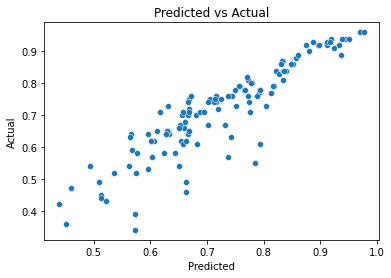

In [22]:
sns.scatterplot(x=y_pred,y=y_test['Chance of Admit '])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual')
plt.show()

- If we get a straight line with the scatter points it is the most accurate model but in real world we cannot get the accuate model.

#### Assumptions of linear regression

- **Multicollinearity:**

In [23]:
y = jam_ed_data[['Chance of Admit ']]
X = jam_ed_data.drop(columns=['Chance of Admit '])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [24]:
def multicollinearity_assumption(features, label, feature_names=None):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    plt.figure(figsize = (10,8))
    sns.heatmap(features.corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()

    VIF = [variance_inflation_factor(np.array(features), i) for i in range(0,features.shape[1])]
    
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))



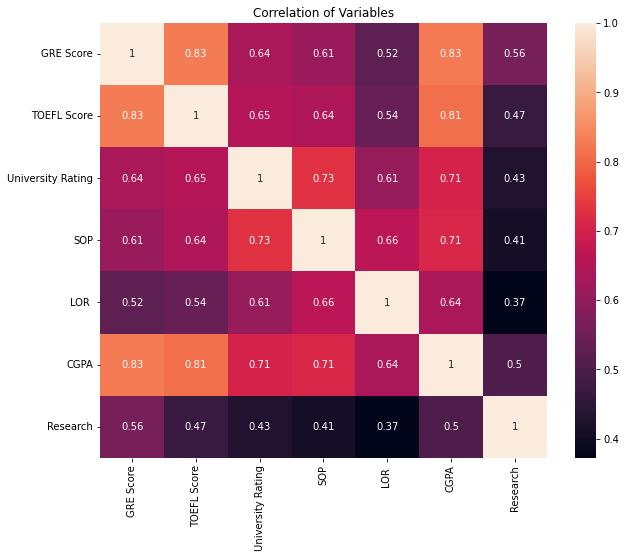

GRE Score: 1308.0610888465158
TOEFL Score: 1215.9518983651624
University Rating: 20.933360945720892
SOP: 35.26500560459989
LOR : 30.91147635400442
CGPA: 950.8179853694207
Research: 2.8694933174820076


In [25]:
multicollinearity_assumption(X,y,X.columns)

- If VIF score is greaterthan 10 its an indication that multicollinearity may be present and if it is greater than 100 there is certain multicollinearity among the variables.
- GRE Score, TOEFL Score, CGPA are highly correlated with eachother that might be a reason for that high VIF score. So we can take one of the variable to fit and get to know the feature importance by weigths. But while prediction there won't be any difference if use all the variables.
- Similar to above University Rating, SOP, LOR are slightly correlated with each other.

- **Mean of residuals:**

In [26]:
residuals = y_pred-y_test['Chance of Admit ']

In [27]:
mean_residuals = np.mean(residuals)

In [28]:
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.007629124173691681


- value should be zero for a good fit linear model. We got nearly zero which is a good fit linear model.

**Mean of Residuals Very close to zero so all good here.**

- **Linearity of variables:** 

In [29]:
from statsmodels.stats.stattools import durbin_watson

In [30]:
durbin_watson(resids=residuals)

1.6208498154645525

**d=1.62**

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data

(0 to 2<) is positive autocorrelation

(>2 to 4) is negative autocorrelation

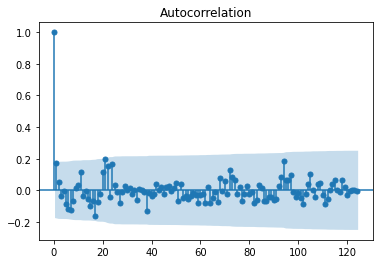

In [31]:
sm.graphics.tsa.plot_acf(residuals, lags=124)
plt.show()

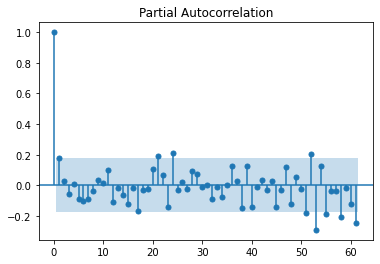

In [32]:
sm.graphics.tsa.plot_pacf(residuals, lags=61)
plt.show()

- All are under the blue region in auto-correlation graph. while in partial Autocorrelation there are some points out of the blue region. So there might be slight partial Autocorrelation in residuals.

- **Test for Homoscedasticity:**

c:\Users\vemul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


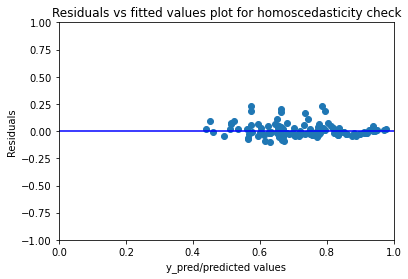

In [33]:
plt.scatter(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-1,1)
plt.xlim(0,1)
p = sns.lineplot([0,1],[0,0],color='blue')
plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

- There is no pattern in residuals with respect to predicted values. As we can observe there is random scatter points.

**Goldfeld Quandt Test**

Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

Null Hypothesis: Error terms are homoscedastic.
Alternative Hypothesis: Error terms are heteroscedastic.

In [34]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)

[('F statistic', 0.7702178409683887), ('p-value', 0.8328652842668297)]

- P-value is greater than 0.05 so we should accept null hypothesis so our residuals are homoscedasity.

- **Normality of residuals**

c:\Users\vemul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


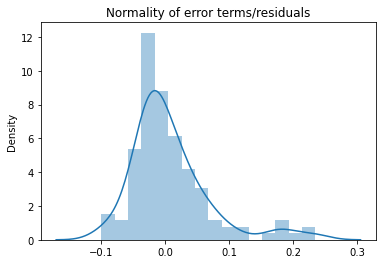

In [35]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

In [36]:
from scipy.stats import probplot,shapiro

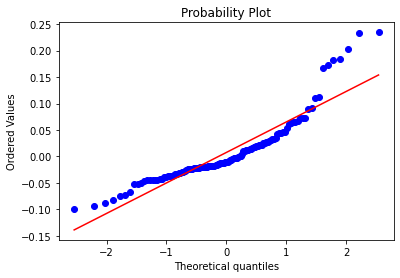

In [37]:
probplot(residuals,plot=plt,dist='norm')
plt.show()

- clearly there is no normality of residuals.

In [38]:
shapiro(residuals)

ShapiroResult(statistic=0.8560423851013184, pvalue=1.1203644678658975e-09)

- P-value is very low it is almost zero. So we reject null hypothesis that is it follows normal distribution.

- **Metrics:**

In [39]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [41]:
MAE_lin = mean_absolute_error(y_test,y_pred)
print(color.BOLD+'Mean Absolute Error of linear regression model : {}'.format(MAE_lin)+color.END)

Mean Absolute Error of linear regression model : 0.042205820533755815


In [42]:
MSE_lin = mean_squared_error(y_test,y_pred)
print(color.BOLD+'Mean Squared Error of linear regression model : {}'.format(MSE_lin)+color.END)

Mean Squared Error of linear regression model : 0.0038171542923580003


In [43]:
RMSE_lin = np.sqrt(MSE_lin)
print(color.BOLD+'Root Mean Squared Error of linear regression model : {}'.format(RMSE_lin)+color.END)

Root Mean Squared Error of linear regression model : 0.061783123038237554


In [44]:
r2_lin = r2_score(y_test,y_pred)
print(color.BOLD+'R2 Score of linear regression model : {}'.format(r2_lin)+color.END)

R2 Score of linear regression model : 0.8127980254458257


In [ ]:
n=len(y_train)
p=len(X_train[0])
adjusted_r2 = 1-(1-r2_lin)*(n-1)/(n-p-1)

#### Ridge Regression

In [61]:
y = jam_ed_data[['Chance of Admit ']]
X = jam_ed_data.drop(columns=['Chance of Admit '])
ms = StandardScaler()
X[['GRE Score', 'TOEFL Score']] = ms.fit_transform(X[['GRE Score', 'TOEFL Score']])

In [62]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [63]:
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.2,random_state=1)

In [64]:
train_scores = []
val_scores = []
scaler = StandardScaler()
r=[0.01,0.1,0.5,0.75,1,2,5,10]
for alpha in r:
  RR = Ridge(alpha)
  RR.fit(X_train, y_train)
  train_score = RR.score(X_train, y_train)
  val_score = RR.score(X_val, y_val)
  train_scores.append(train_score)
  val_scores.append(val_score)

pd.DataFrame({'alpha':r,'train_score':train_scores,'val_scores':val_scores})

,alpha,train_score,val_scores
0,0.01,0.813369,0.843324
1,0.10,0.813368,0.843260
2,0.50,0.813353,0.842971
3,0.75,0.813334,0.842788
4,1.00,0.813308,0.842601
5,2.00,0.813143,0.841837
6,5.00,0.812234,0.839449
7,10.00,0.810056,0.835488


In [65]:
alpha = 0.01
R_reg = Ridge(alpha)
R_reg.fit(X_train,y_train)

Ridge(alpha=0.01)

In [66]:
y_pred = R_reg.predict(X_test)

In [67]:
MAE_rr = mean_absolute_error(y_test,y_pred)
print(color.BOLD+'Mean Absolute Error of Ridge regression model : {}'.format(MAE_rr)+color.END)

Mean Absolute Error of Ridge regression model : 0.04120667960944864


In [68]:
MSE_rr = mean_squared_error(y_test,y_pred)
print(color.BOLD+'Mean Squared Error of Ridge regression model : {}'.format(MSE_rr)+color.END)

Mean Squared Error of Ridge regression model : 0.0036149637311670485


In [69]:
RMSE_rr = np.sqrt(MSE_rr)
print(color.BOLD+'Root Mean Squared Error of Ridge regression model : {}'.format(RMSE_rr)+color.END)

Root Mean Squared Error of Ridge regression model : 0.06012456844890488


In [70]:
r2_rr = r2_score(y_test,y_pred)
print(color.BOLD+'R2 Score of Ridge regression model : {}'.format(r2_rr)+color.END)

R2 Score of Ridge regression model : 0.8128028723956787


#### Lasso Regression:

In [71]:
train_scores = []
val_scores = []
l=[0.00001,0.0001,0.001,0.01,0.1,0.5,0.75,1,2,5,10]
for alpha in l:
  LR = Lasso(alpha)
  LR.fit(X_train, y_train)
  train_score = LR.score(X_train, y_train)
  val_score = LR.score(X_val, y_val)
  train_scores.append(train_score)
  val_scores.append(val_score)

pd.DataFrame({'alpha':l,'train_score':train_scores,'val_scores':val_scores})

,alpha,train_score,val_scores
0,0.00001,0.813369,0.843306
1,0.00010,0.813366,0.843070
2,0.00100,0.813052,0.840470
3,0.01000,0.793213,0.801607
4,0.10000,0.181668,0.165494
5,0.50000,0.000000,-0.003074
6,0.75000,0.000000,-0.003074
7,1.00000,0.000000,-0.003074
8,2.00000,0.000000,-0.003074
9,5.00000,0.000000,-0.003074


In [72]:
alpha = 0.0001
L_reg = Lasso(alpha)
L_reg.fit(X_train,y_train)

Lasso(alpha=0.0001)

In [73]:
y_pred = L_reg.predict(X_test)

In [74]:
MAE_lr = mean_absolute_error(y_test,y_pred)
print(color.BOLD+'Mean Absolute Error of Ridge regression model : {}'.format(MAE_lr)+color.END)

Mean Absolute Error of Ridge regression model : 0.041230701635070165


In [75]:
MSE_lr = mean_squared_error(y_test,y_pred)
print(color.BOLD+'Mean Squared Error of Ridge regression model : {}'.format(MSE_lr)+color.END)

Mean Squared Error of Ridge regression model : 0.003621329347803916


In [76]:
RMSE_lr = np.sqrt(MSE_lr)
print(color.BOLD+'Root Mean Squared Error of Ridge regression model : {}'.format(RMSE_lr)+color.END)

Root Mean Squared Error of Ridge regression model : 0.06017748206600136


In [77]:
r2_lr = r2_score(y_test,y_pred)
print(color.BOLD+'R2 Score of Ridge regression model : {}'.format(r2_lr)+color.END)

R2 Score of Ridge regression model : 0.8124732355753759


- All regression models have almost same r2 score. ridge regression is having slight high r2 score.

**Actionable Insights & Recommendations**

- CGPA, GRE Score, TOEFL Score are highly important variables for chance of admit.
- The University Rating is moderate important variable for predicting chance of admit.
- In additional to reasearch if there are projects done by applicant are highly reated then that may be a good factor.
- Financial Status or the bank loan approval factor may effect.
- This linear regression predicting model helpful to know in there website whether their chance of admit is high or low.

